<a href="https://colab.research.google.com/github/dhayanesh/CNN-Transformer-EfficientNet-LeNet/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1:**
Demonstrate that a neural network to maximize the log-likelihood of the label has softmax output nodes and minimizes the criterion function of the negative log probability of the training data set. Train a LeNet-5 to classify CIFAR-10 images with and without image augmentation — plot training/validation loss/accuracy, provide the confusion matrix, and draw some correctly and incorrectly classified images. What best performance can you get? Useful links:

*   https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48 
*   https://paperswithcode.com/sota/image-classification-on-cifar-10

Run with GPU Runtime!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
cifar10  = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train = tf.floor(tf.constant(x_train, dtype = tf.float32)/255)
Y_train = tf.constant(y_train, dtype = tf.int32)
X_test = tf.floor(tf.constant(x_test, dtype = tf.float32)/255)
Y_test = tf.constant(y_test, dtype = tf.int32)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
#Reference: https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
modelAug = Sequential()
modelAug.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Flatten())
modelAug.add(Dense(256, activation='relu'))
modelAug.add(Dense(84, activation='relu'))
modelAug.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/50
391/391 [==============================] - 6s 9ms/step - loss: 2.8324 - accuracy: 0.3242 - val_loss: 1.6088 - val_accuracy: 0.4213
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4522 - accuracy: 0.4798 - val_loss: 1.3738 - val_accuracy: 0.5029
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2375 - accuracy: 0.5636 - val_loss: 1.2893 - val_accuracy: 0.5526
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.0970 - accuracy: 0.6142 - val_loss: 1.2043 - val_accuracy: 0.5820
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9730 - accuracy: 0.6617 - val_loss: 1.1636 - val_accuracy: 0.6070
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.8635 - accuracy: 0.6986 - val_loss: 1.1763 - val_accuracy: 0.6091
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.7617 - accuracy: 0.7330 - val_loss: 1.1548 - val_accuracy: 0.6323
Epoch 

In [ ]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [ ]:
datagen.fit(x_train)

In [ ]:
modelAug.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
historyAug = modelAug.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=50, validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/50
390/390 [==============================] - 31s 75ms/step - loss: 2.6020 - accuracy: 0.3047 - val_loss: 1.6698 - val_accuracy: 0.3866
Epoch 2/50
390/390 [==============================] - 27s 69ms/step - loss: 1.5905 - accuracy: 0.4212 - val_loss: 1.5305 - val_accuracy: 0.4448
Epoch 3/50
390/390 [==============================] - 26s 67ms/step - loss: 1.5084 - accuracy: 0.4572 - val_loss: 1.3749 - val_accuracy: 0.5019
Epoch 4/50
390/390 [==============================] - 27s 70ms/step - loss: 1.4527 - accuracy: 0.4775 - val_loss: 1.4214 - val_accuracy: 0.5009
Epoch 5/50
390/390 [==============================] - 26s 68ms/step - loss: 1.4028 - accuracy: 0.4989 - val_loss: 1.3377 - val_accuracy: 0.5310
Epoch 6/50
390/390 [==============================] - 27s 69ms/step - loss: 1.3577 - accuracy: 0.5165 - val_loss: 1.3853 - val_accuracy: 0.5159
Epoch 7/50
390/390 [==============================] - 26s 68ms/step - loss: 1.3060 - accuracy: 0.5366 - val_loss: 1.2351 - val_accuracy:

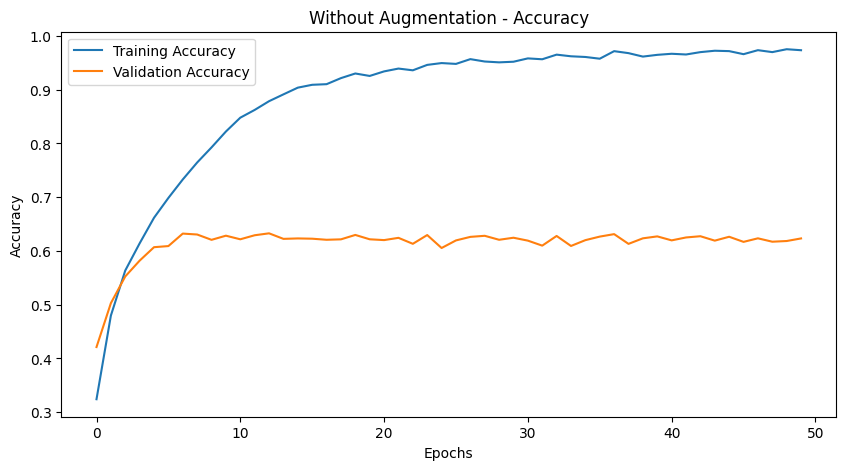

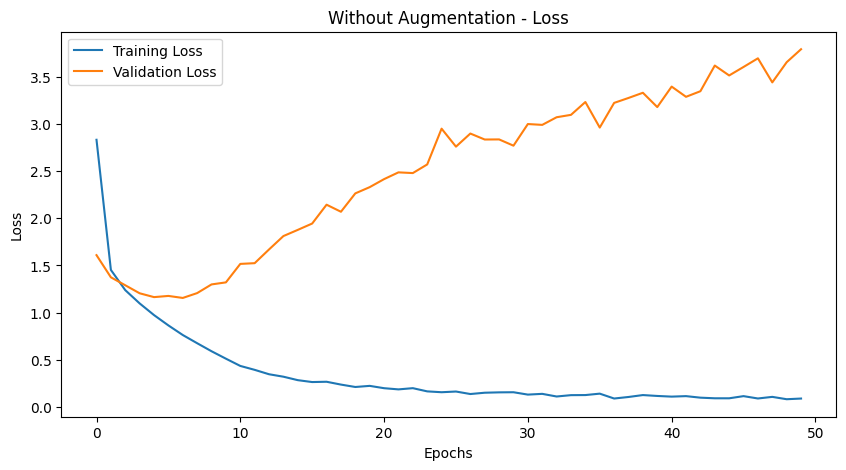

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Without Augmentation - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Without Augmentation - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

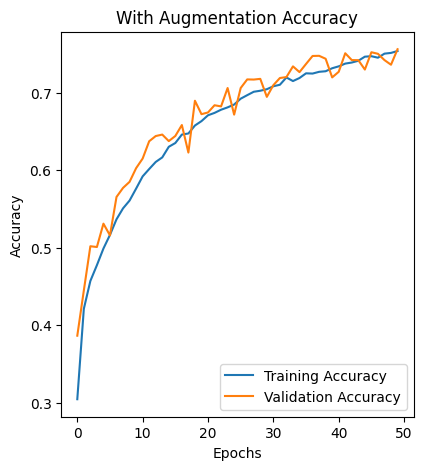

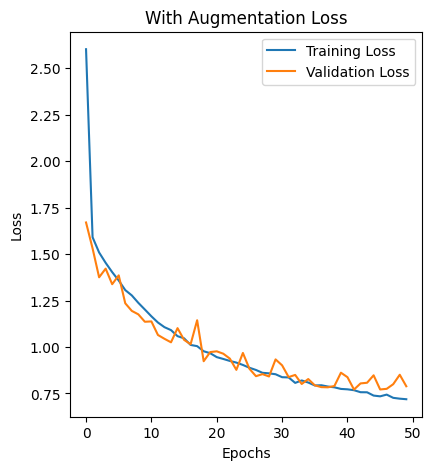

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyAug.history['accuracy'], label='Training Accuracy')
plt.plot(historyAug.history['val_accuracy'], label='Validation Accuracy')
plt.title('With Augmentation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(historyAug.history['loss'], label='Training Loss')
plt.plot(historyAug.history['val_loss'], label='Validation Loss')
plt.title('With Augmentation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = tf.argmax(model.predict(x_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)
conf_Mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix - Augmentation:\n", conf_Mat)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - Augmentation:
 [[720  14  63  13  23  11  13  12  96  35]
 [ 35 746   6   9  10  17  11   7  50 109]
 [ 79   9 531  52  97  77  63  57  22  13]
 [ 29  14  92 339  81 217  92  64  37  35]
 [ 47   9 111  61 525  68  56  94  16  13]
 [ 24   8  81 141  58 505  56  85  23  19]
 [ 15  10  66  67  50  56 685  20  14  17]
 [ 35   5  55  37  62  71  13 691  11  20]
 [ 91  28  21  15   7  13   7  10 767  41]
 [ 48  91  15  17   9  14  13  22  47 724]]


In [ ]:
y_pred_aug = tf.argmax(modelAug.predict(x_test), axis=-1)
y_true_aug = tf.argmax(y_test, axis=-1)
conf_MatAug = confusion_matrix(y_true_aug, y_pred_aug)
print("Confusion Matrix - Augmentation:\n", conf_MatAug)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - Augmentation:
 [[761  18  37  10  12   8  10  16  73  55]
 [  6 903   5   4   1   1   4   2   7  67]
 [ 68   8 665  26  54  57  67  34  12   9]
 [ 28  17  58 412  43 199 123  63  14  43]
 [ 22   2  60  22 690  42  83  69   5   5]
 [ 11  10  41  81  37 699  40  52   8  21]
 [  8  10  38  19  14  17 869  10   6   9]
 [ 18   8  22  12  16  53  15 840   4  12]
 [ 42  37  14  10   3   2   4   4 849  35]
 [ 22  69   4   5   1   3   2  11  13 870]]


313/313 [==============================] - 1s 2ms/step
Correctly classified images for model without augmentation:


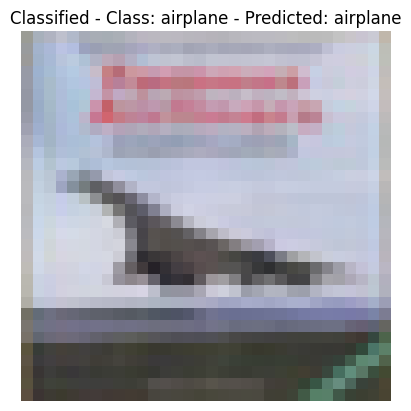

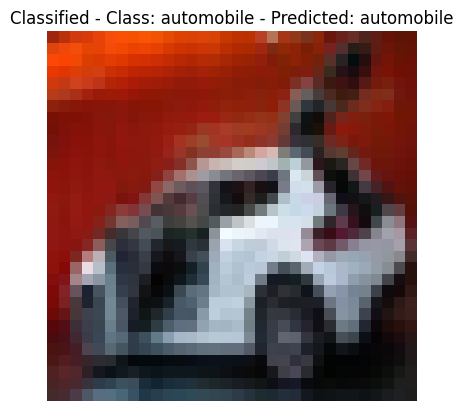

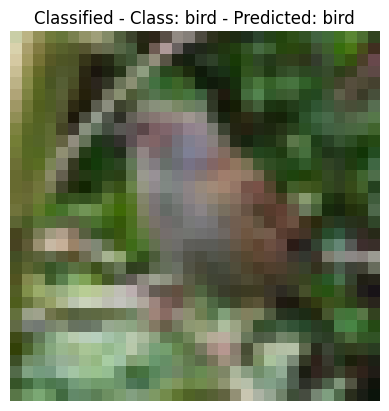

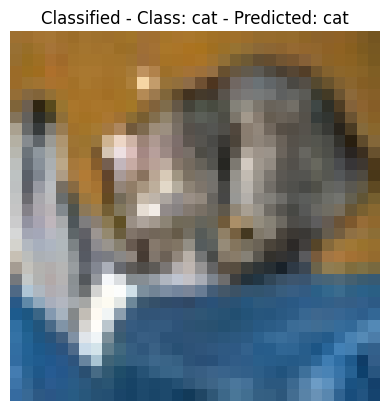

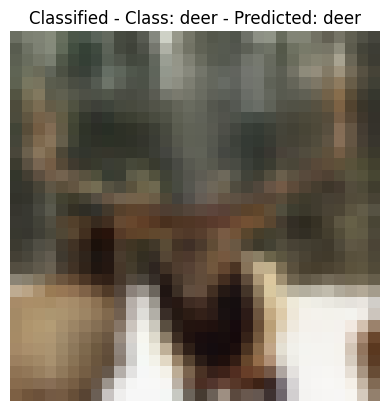

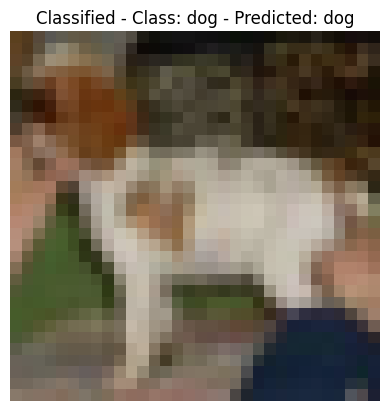

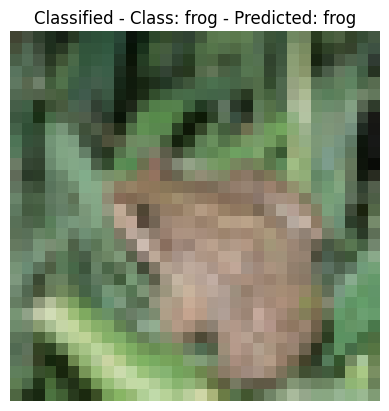

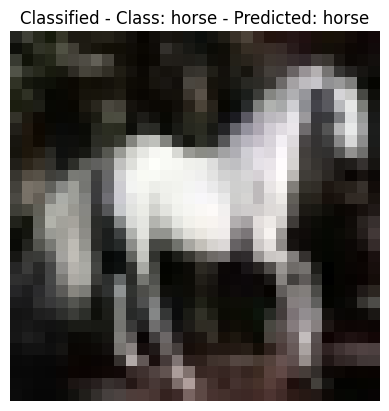

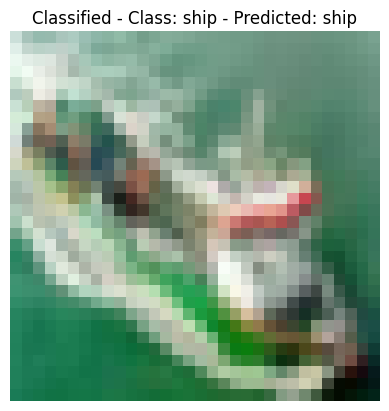

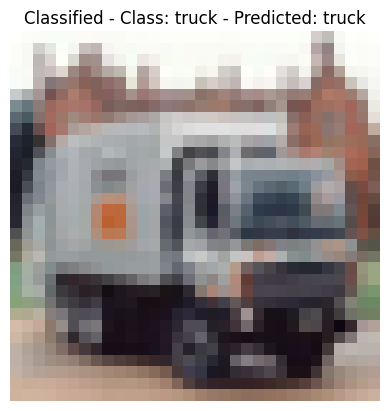

Incorrectly classified images for model without augmentation:


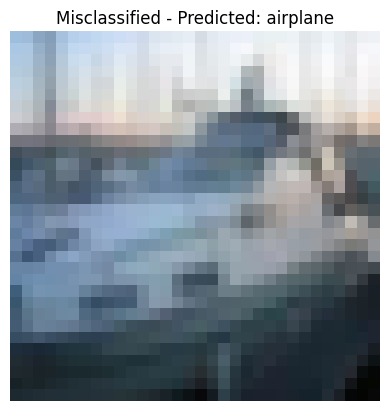

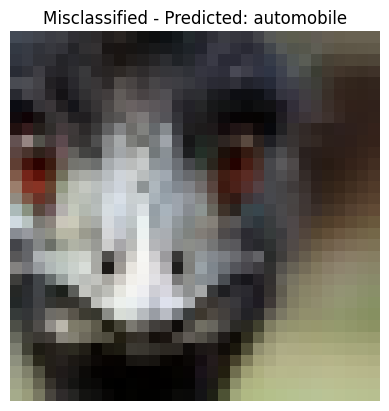

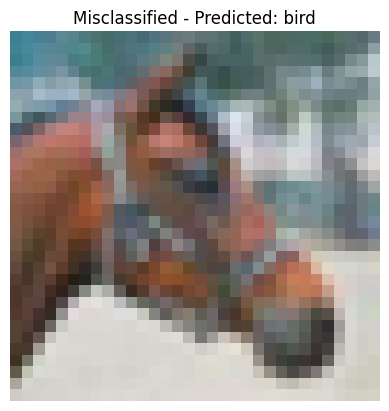

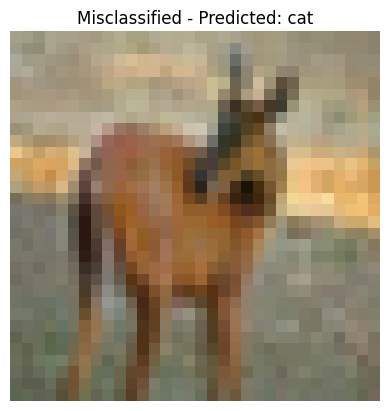

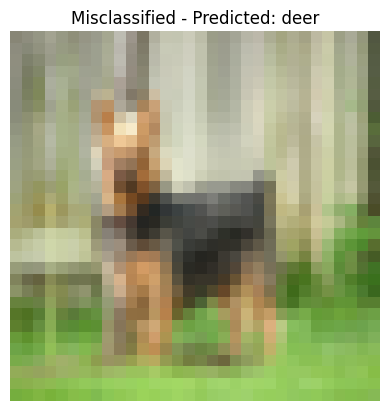

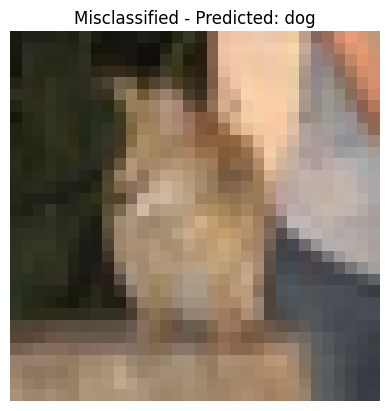

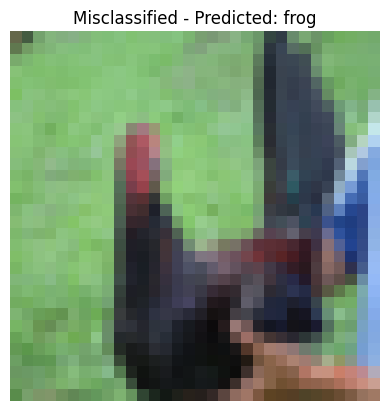

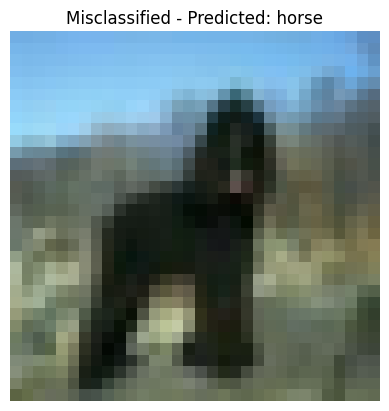

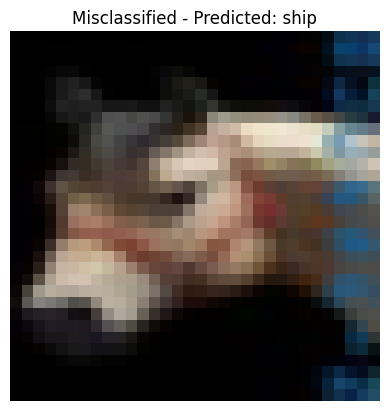

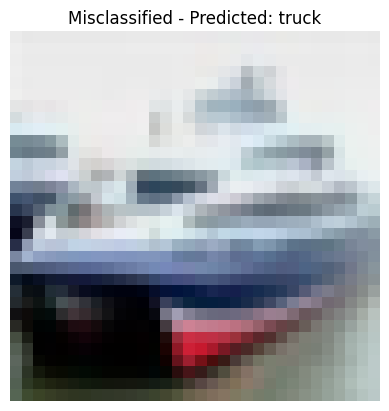

313/313 [==============================] - 1s 2ms/step
Correctly classified images for model with augmentation:


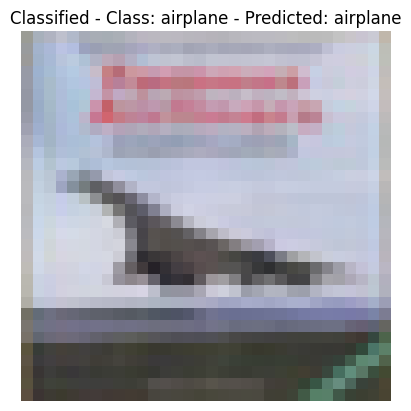

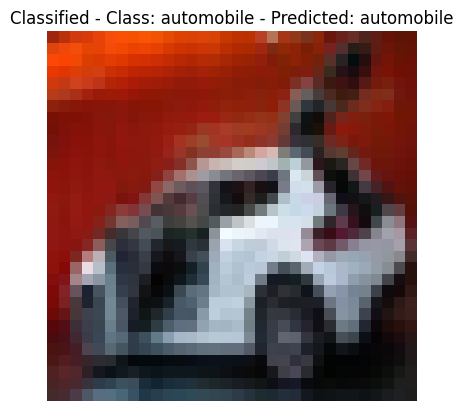

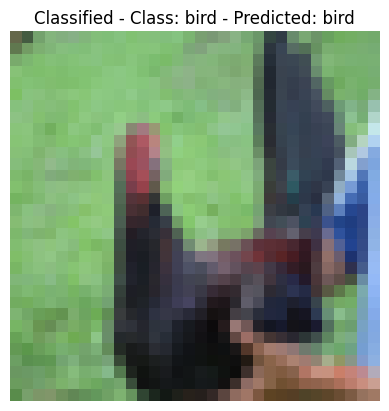

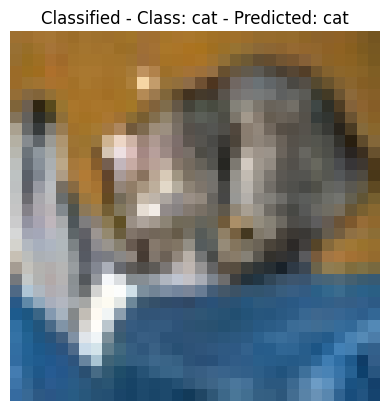

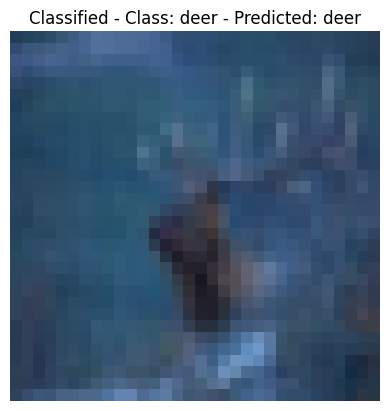

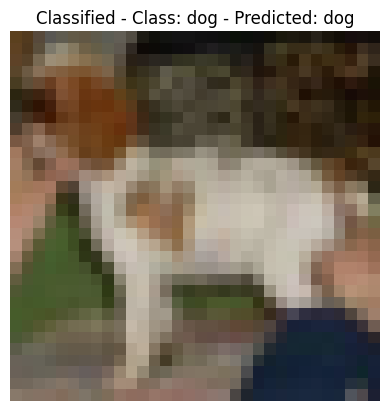

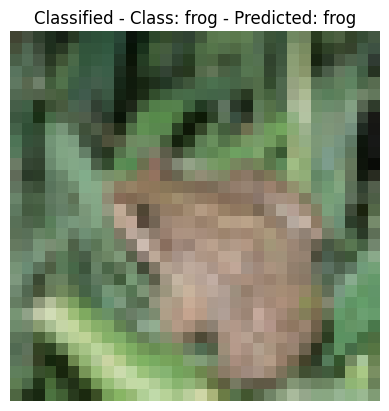

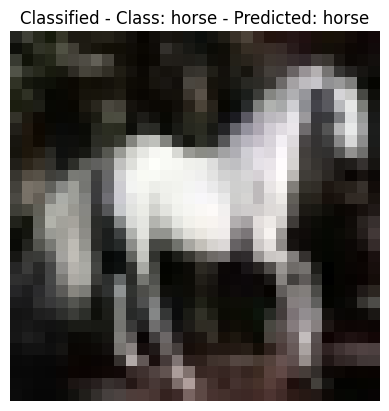

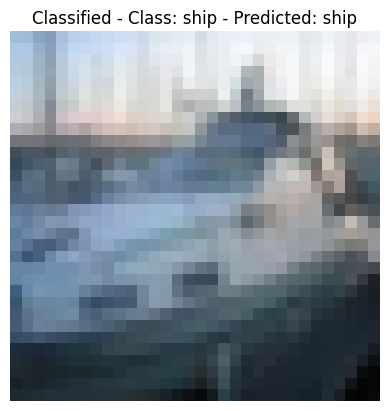

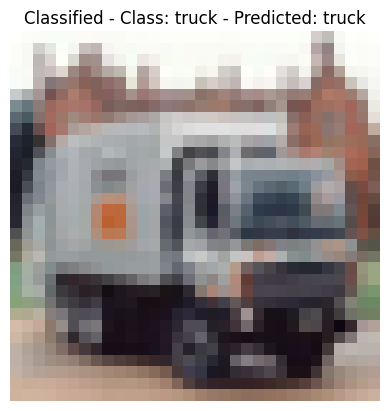

Incorrectly classified images for model with augmentation:


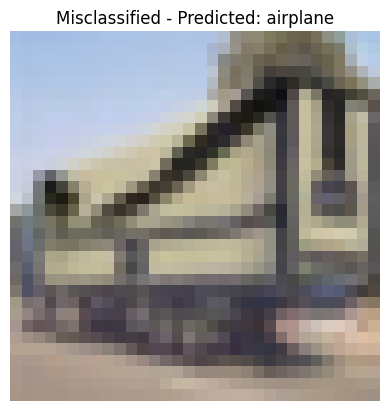

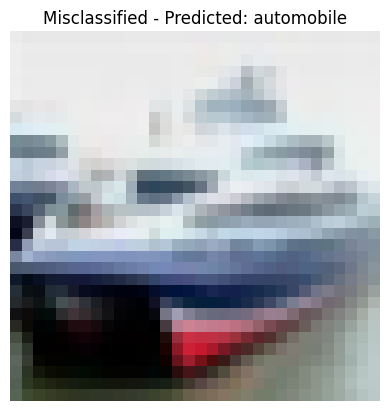

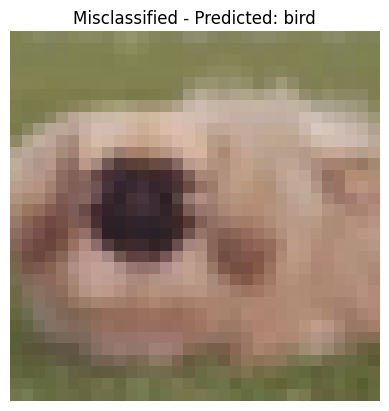

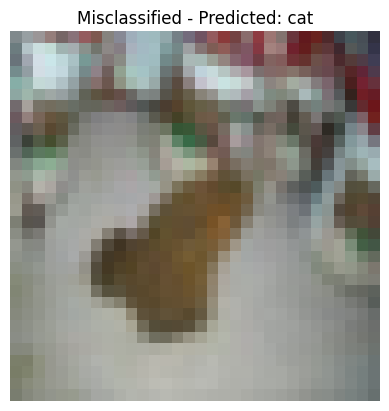

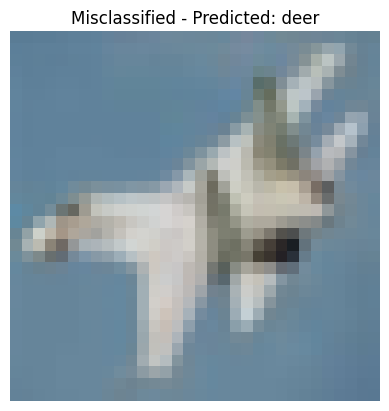

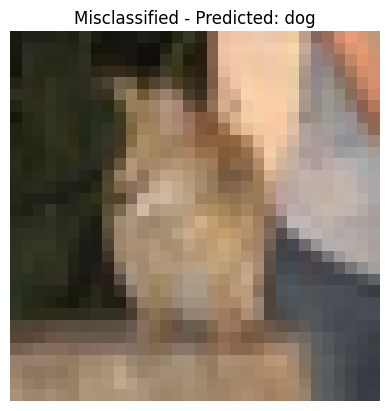

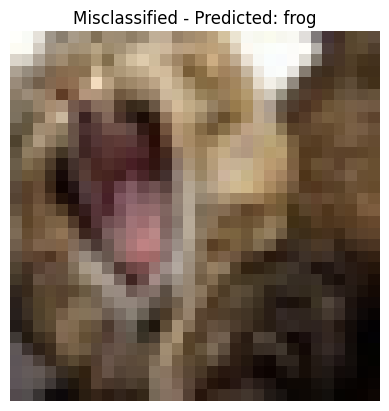

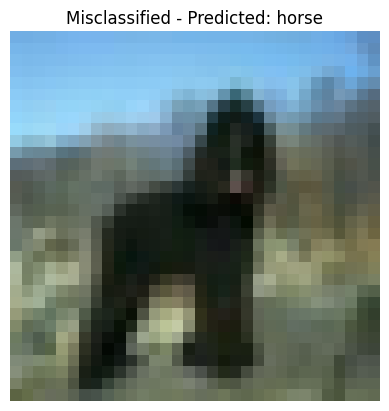

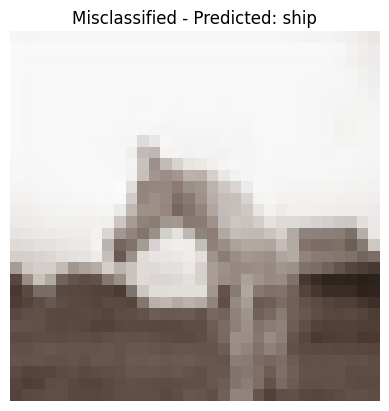

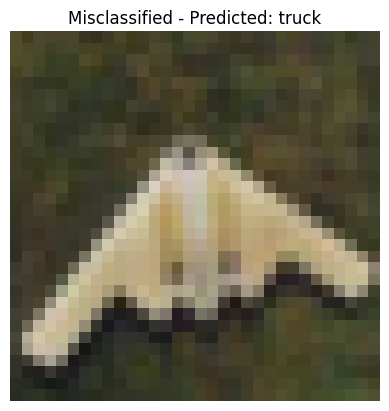

In [ ]:
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
#image plotting code reused from previous assignment
def plotImages(model, x_test, y_test, modelType, correct=True):
    y_pred = tf.argmax(model.predict(x_test), axis=-1)
    y_true = tf.argmax(y_test, axis=-1)

    corr_imgs = {new_list: [] for new_list in range(0, 10)}
    incorr_imgs = {new_list: [] for new_list in range(0, 10)}

    for i in range(len(x_test)):
        predVal_int = y_pred[i].numpy()
        trueVal_int = y_true[i].numpy()

        if predVal_int == trueVal_int:
            if len(corr_imgs[trueVal_int]) < 1:
                corr_imgs[trueVal_int].append((x_test[i], predVal_int))
        else:
            if len(incorr_imgs[predVal_int]) < 1:
                incorr_imgs[predVal_int].append((x_test[i], predVal_int))

    print(f"Correctly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(corr_imgs[i])):
            img, pred = corr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Classified - Class: {class_names[i]} - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

    print(f"Incorrectly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(incorr_imgs[i])):
            img, pred = incorr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Misclassified - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

plotImages(model, x_test, y_test, "model without augmentation", correct=True)
plotImages(modelAug, x_test, y_test, "model with augmentation", correct=True)


**From the plotting, it is evident that the accuracy of the model improved with using image augmentation compared to without image augmentation. We were able to achieve accuracy upto 62% without augmentation and 75% with augmentation.**

**Task 2:** Build an EfficientNet from scratch and train this network to classify CIFAR-100 images. Report your understanding of the several techniques involved in EfficientNet, such as depthwise convolution, stochastic depth, and attention mechanism. What performance can you get? 

Depth Convolution:

In [ ]:
import tensorflow as tf

Reference:
*   https://arxiv.org/abs/1905.11946
*   https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
*   https://www.tensorflow.org/tutorials/images/data_augmentation
*   https://keras.io/api/layers/preprocessing_layers/image_preprocessing/

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, DepthwiseConv2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import add, multiply
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Reference:


*   https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
*   https://towardsdatascience.com/squeeze-and-excitation-networks-9ef5e71eacd7
*   https://towardsdatascience.com/attention-in-computer-vision-fd289a5bd7ad






In [ ]:
def swish(x):
    return x * tf.keras.backend.sigmoid(x)

In [ ]:
def SEBlock(input_tensor, reduction_ratio=0.25, dense_activation='swish'):
    channels = input_tensor.shape[-1]
    se_units = int(channels * reduction_ratio)
    x = GlobalAveragePooling2D()(input_tensor)
    x = Dense(se_units, activation=dense_activation, use_bias=False)(x)
    x = Dense(channels, activation='sigmoid', use_bias=False)(x)
    x = tf.keras.layers.Reshape((1, 1, channels))(x)
    return multiply([input_tensor, x])

In [ ]:
def MBConvBlock(input_tensor, expansion_factor, output_channels, kernel_size, stride, se_ratio=None, drop_rate=0. , conv_padding='same', bn_momentum=0.99):
    input_channels = input_tensor.shape[-1]
    expanded_channels = int(input_channels * expansion_factor)

    x = Conv2D(expanded_channels, kernel_size, stride, padding=conv_padding, use_bias=False)(input_tensor)
    x = BatchNormalization(momentum=bn_momentum)(x)
    x = swish(x)

    if se_ratio:
        x = SEBlock(x, reduction_ratio=se_ratio)

    x = Conv2D(output_channels, 1, 1, padding=conv_padding, use_bias=False)(x)
    x = BatchNormalization(momentum=bn_momentum)(x)

    if input_channels == output_channels and stride == 1:
        if drop_rate > 0.:
            x = Dropout(drop_rate)(x)
        x = add([input_tensor, x])

    return x

In [ ]:
def EfficientNet(width_coefficient, depth_coefficient, dropout_rate, input_shape, num_classes, kernel_init='glorot_uniform'):
    channels = int(32 * width_coefficient)

    inputs = tf.keras.Input(shape=input_shape)

    x = Conv2D(channels, 3, 1, padding='same', use_bias=False, kernel_initializer=kernel_init)(inputs)
    x = BatchNormalization()(x)
    x = swish(x)

    mbconv_settings = [
        {'expansion_factor': 1, 'output_channels': 16, 'kernel_size': 3, 'stride': 1, 'se_ratio': None},
        {'expansion_factor': 1, 'output_channels': 24, 'kernel_size': 3, 'stride': 2, 'se_ratio': None},
        {'expansion_factor': 1.5, 'output_channels': 24, 'kernel_size': 3, 'stride': 1, 'se_ratio': None},
        {'expansion_factor': 3, 'output_channels': 40, 'kernel_size': 5, 'stride': 2, 'se_ratio': 0.25},
        {'expansion_factor': 3, 'output_channels': 40, 'kernel_size': 5, 'stride': 1, 'se_ratio': 0.25},
        {'expansion_factor': 4, 'output_channels': 80, 'kernel_size': 3, 'stride': 2, 'se_ratio': 0.25},
        {'expansion_factor': 4, 'output_channels': 80, 'kernel_size': 3, 'stride': 1, 'se_ratio': 0.25},
        {'expansion_factor': 4, 'output_channels': 112, 'kernel_size': 5, 'stride': 1, 'se_ratio': 0.25},
        {'expansion_factor': 4.5, 'output_channels': 112, 'kernel_size': 5, 'stride': 1, 'se_ratio': 0.25},
        {'expansion_factor': 4.5, 'output_channels': 160, 'kernel_size': 5, 'stride': 2, 'se_ratio': 0.25},
        {'expansion_factor': 4.5, 'output_channels': 160, 'kernel_size': 5, 'stride': 1, 'se_ratio': 0.25},
        ]
    for setting in mbconv_settings:
      x = MBConvBlock(x, **setting, drop_rate=dropout_rate)

    x = Conv2D(960, 1, 1, padding='same', use_bias=False, kernel_initializer=kernel_init)(x)
    x = BatchNormalization()(x)
    x = swish(x)

    x = GlobalAveragePooling2D()(x)
    if dropout_rate > 0.:
        x = Dropout(dropout_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer=kernel_init)(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
model = EfficientNet(width_coefficient=1.0, depth_coefficient=1.0, dropout_rate=0.2, input_shape=(32, 32, 3), num_classes=100)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('effnet_cifar100.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

In [ ]:
model.fit(train_datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) // 128,
                    epochs=25,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/25
390/390 [==============================] - ETA: 0s - loss: 2.1108 - accuracy: 0.4296
Epoch 1: val_accuracy improved from 0.36070 to 0.42050, saving model to effnet_cifar100.h5
390/390 [==============================] - 37s 94ms/step - loss: 2.1108 - accuracy: 0.4296 - val_loss: 2.1713 - val_accuracy: 0.4205
Epoch 2/25
390/390 [==============================] - ETA: 0s - loss: 1.9897 - accuracy: 0.4541
Epoch 2: val_accuracy improved from 0.42050 to 0.42220, saving model to effnet_cifar100.h5
390/390 [==============================] - 37s 96ms/step - loss: 1.9897 - accuracy: 0.4541 - val_loss: 2.2062 - val_accuracy: 0.4222
Epoch 3/25
390/390 [==============================] - ETA: 0s - loss: 1.8838 - accuracy: 0.4803
Epoch 3: val_accuracy improved from 0.42220 to 0.47350, saving model to effnet_cifar100.h5
390/390 [==============================] - 36s 94ms/step - loss: 1.8838 - accuracy: 0.4803 - val_loss: 1.9728 - val_accuracy: 0.4735
Epoch 4/25
390/390 [====================

In [ ]:
model.load_weights('effnet_cifar100.h5')

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 14ms/step - loss: 2.4073 - accuracy: 0.5285
Test loss: 2.407292366027832
Test accuracy: 0.5285000205039978


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)

313/313 [==============================] - 3s 7ms/step


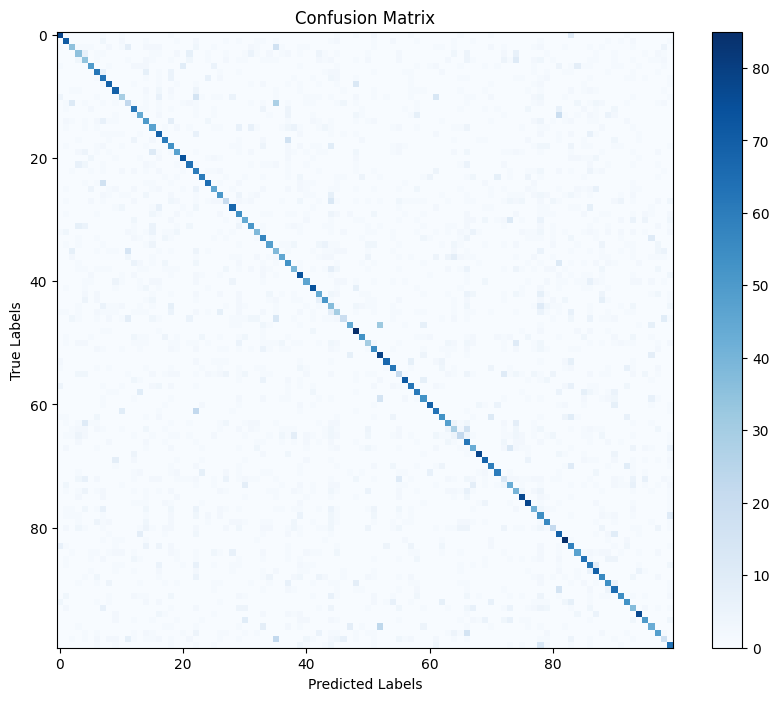

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



*   Depthwise Convolution: EfficientNet makes use of a factorized form of the 
standard convolution technique called depthwise separable convolution. The input channels are convolved separately with their respective filters in a depthwise convolution, and then the output channels are combined in a pointwise convolution. By using fewer parameters and computations than traditional convolution while keeping the same or higher accuracy, this enables more effective computing.

*   Stochastic Depth: EfficientNet proposes the stochastic depth approach, which randomly skips a fraction of layers during training. This is accomplished by randomly dropping out layers after each training cycle, hence lowering the network's depth. The stochastic depth assists in regularizing the network and boosting its generalization ability by skipping layers during training.

*   Attention Mechanism: Swish activation function, a self-attention mechanism built into EfficientNet, adaptively modulates feature responses according to their significance. Swish is a sigmoid based activation function that enables the network to discover an element-wise scaling factor for each feature map, improving feature representation and model performance.


We ran it for 50 epochs, but early stopping occured and we achieved accuracy of about 90% during training and 53% in validation with default parameters.

Epoch 43: val_accuracy did not improve from 0.54910
390/390 [==============================] - 37s 95ms/step - loss: 0.2814 - accuracy: 0.9093 - val_loss: 2.6236 - val_accuracy: 0.5395
Epoch 43: early stopping


**Task 3:**
 Build a vision transformer from scratch and train this network to classify CIFAR-10 and CIFAR-100 images. Report your understanding of the several techniques involved. What performance do you get in comparison with the reported performances? Useful links: https://github.com/tensorflow/models/blob/master/official/vision/MODEL_GARDEN.md



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
#CIFAR-10 dataset
(x_train10, y_train10), (x_test10, y_test10) = tf.keras.datasets.cifar10.load_data()

#CIFAR-100 dataset
(x_train100, y_train100), (x_test100, y_test100) = tf.keras.datasets.cifar100.load_data()

In [ ]:
X_train10 = tf.floor(tf.constant(x_train10, dtype = tf.float32)/255)
Y_train10 = tf.constant(y_train10, dtype = tf.int32)
X_test10 = tf.floor(tf.constant(x_test10, dtype = tf.float32)/255)
Y_test10 = tf.constant(y_test10, dtype = tf.int32)

X_train100 = tf.floor(tf.constant(x_train100, dtype = tf.float32)/255)
Y_train100 = tf.constant(y_train100, dtype = tf.int32)
X_test100 = tf.floor(tf.constant(x_test100, dtype = tf.float32)/255)
Y_test100 = tf.constant(y_test100, dtype = tf.int32)

In [ ]:
Y_train10, Y_test10 = keras.utils.to_categorical(Y_train10), keras.utils.to_categorical(Y_test10)
Y_train100, Y_test100 = keras.utils.to_categorical(Y_train100), keras.utils.to_categorical(Y_test100)

In [ ]:
#Reference: https://keras.io/examples/vision/image_classification_with_vision_transformer/

def create_vit(num_classes, patch_size, num_layers, hidden_size, num_heads, mlp_size, input_shape=(32, 32, 3)):
    #perform data augmentation
    data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.02),
            layers.experimental.preprocessing.RandomZoom(0.2),
        ]
    )
    
    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    
    patch_height = patch_size[0]
    patch_width = patch_size[1]
    num_channels = augmented.shape[-1]
    x = layers.Reshape((-1, patch_height * patch_width * num_channels))(augmented)
    x = layers.Dense(hidden_size)(x)
    
    num_patches = (augmented.shape[1] // patch_height) * (augmented.shape[2] // patch_width)
    pos_emb = layers.Embedding(input_dim=num_patches, output_dim=hidden_size)(tf.range(num_patches))
    x = pos_emb + x
    
    for _ in range(num_layers):
        y = x  #save for residual connection
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size // num_heads, dropout=0.1)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y + pos_emb)  #add residual connection
        y = layers.Dense(mlp_size, activation="relu")(x)
        y = layers.Dense(hidden_size)(y)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y)
        
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.5)(x)
    
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

vit10 = create_vit(num_classes=10, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)

vit100 = create_vit(num_classes=100, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)


In [ ]:
vit10.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_vit10 = vit10.fit(X_train10, Y_train10, epochs=25, validation_data=(X_test10, Y_test10), batch_size=64)

vit100.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_vit100 = vit100.fit(X_train100, Y_train100, epochs=25, validation_data=(X_test100, Y_test100), batch_size=64)

Epoch 1/25
782/782 [==============================] - 53s 37ms/step - loss: 2.4235 - accuracy: 0.1123 - val_loss: 2.2780 - val_accuracy: 0.1267
Epoch 2/25
782/782 [==============================] - 28s 35ms/step - loss: 2.2999 - accuracy: 0.1178 - val_loss: 2.3102 - val_accuracy: 0.1000
Epoch 3/25
782/782 [==============================] - 27s 34ms/step - loss: 2.3124 - accuracy: 0.0991 - val_loss: 2.3137 - val_accuracy: 0.1000
Epoch 4/25
782/782 [==============================] - 27s 35ms/step - loss: 2.3096 - accuracy: 0.1004 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 5/25
782/782 [==============================] - 27s 35ms/step - loss: 2.3073 - accuracy: 0.0986 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 6/25
782/782 [==============================] - 27s 34ms/step - loss: 2.3064 - accuracy: 0.0986 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 7/25
782/782 [==============================] - 27s 34ms/step - loss: 2.3052 - accuracy: 0.0988 - val_loss: 2.3039 - val_accuracy:

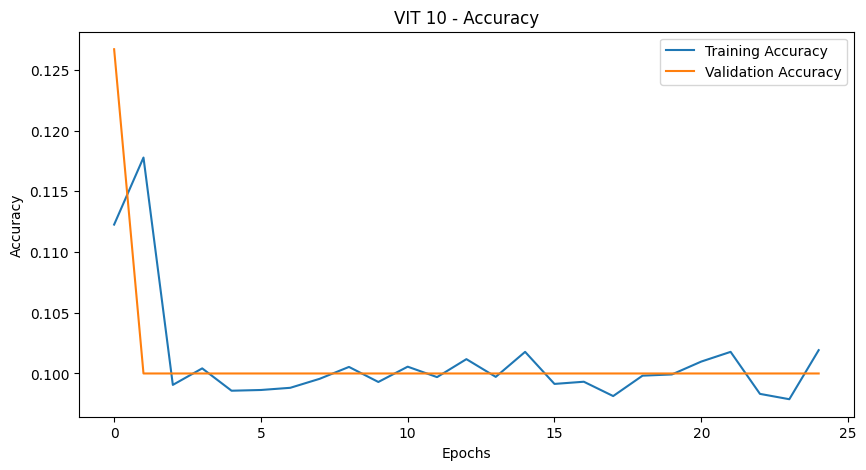

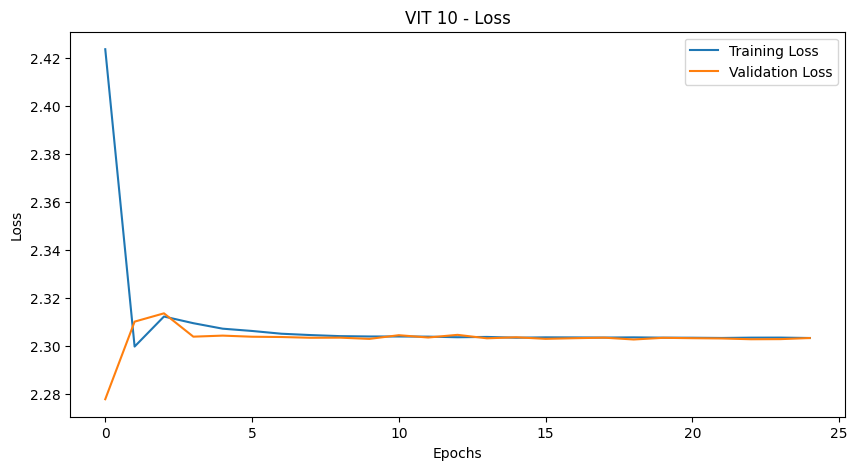

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_vit10.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit10.history['val_accuracy'], label='Validation Accuracy')
plt.title('VIT 10 - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_vit10.history['loss'], label='Training Loss')
plt.plot(history_vit10.history['val_loss'], label='Validation Loss')
plt.title('VIT 10 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

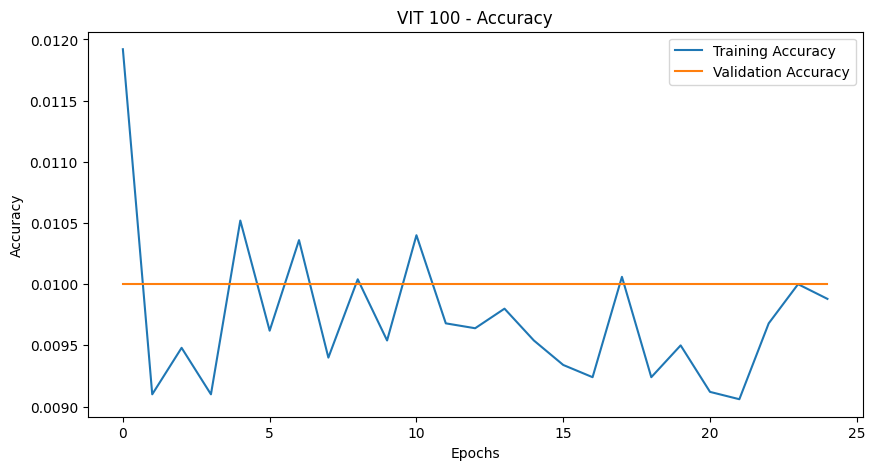

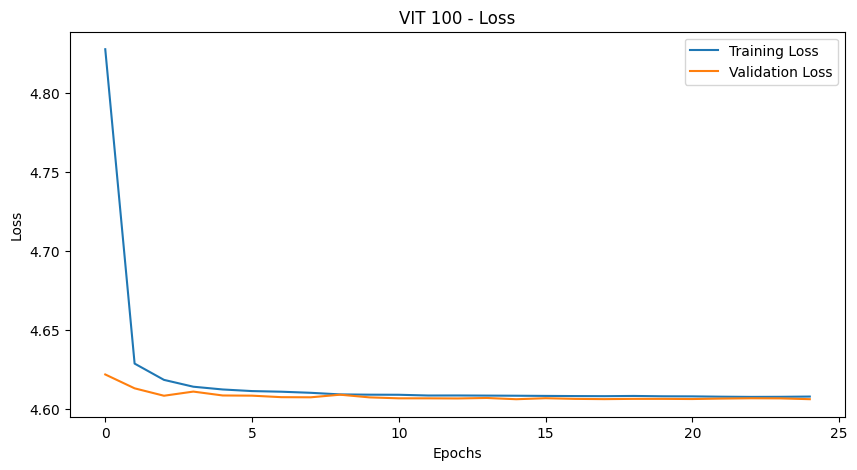

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_vit100.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit100.history['val_accuracy'], label='Validation Accuracy')
plt.title('VIT 100 - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_vit100.history['loss'], label='Training Loss')
plt.plot(history_vit100.history['val_loss'], label='Validation Loss')
plt.title('VIT 100 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()